In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

api_url = 'https://api.api-ninjas.com/v1/interestrate'
response = requests.get(api_url, headers={'X-Api-Key': 'RsRvFR7h46yS7F+4N6W32w==PqqYM848GhNeGe4R'})
if response.status_code == requests.codes.ok:
    current_interest_rate = response.text
    print(current_interest_rate)



{"central_bank_rates": [{"central_bank": "American Central Bank", "country": "United States", "rate_pct": 5.5, "last_updated": "07-26-2023"}, {"central_bank": "Australian Central Bank", "country": "Australia", "rate_pct": 4.35, "last_updated": "11-08-2023"}, {"central_bank": "British Central Bank", "country": "United Kingdom", "rate_pct": 5.25, "last_updated": "08-03-2023"}, {"central_bank": "Chilean Central Bank", "country": "Chile", "rate_pct": 9.0, "last_updated": "10-26-2023"}, {"central_bank": "Chinese Central Bank", "country": "China", "rate_pct": 3.45, "last_updated": "08-21-2023"}, {"central_bank": "Czech Central Bank", "country": "Czech Republic", "rate_pct": 7.0, "last_updated": "06-22-2022"}, {"central_bank": "Danish Central Bank", "country": "Denmark", "rate_pct": 3.75, "last_updated": "09-15-2023"}, {"central_bank": "Mexican Central Bank", "country": "Mexico", "rate_pct": 11.25, "last_updated": "03-30-2023"}, {"central_bank": "New Zealand Central Bank", "country": "New Zea

In [2]:
interestratedata_df= pd.read_csv("Resources/mortgageratedata.csv")
interestratedata_df.head()
appl_stock_df = pd.read_csv("Resources/AAPL.csv")
appl_stock_df
interestratedata_df

,Date,MORTGAGE30US
0,2009-01-08,5.01
1,2009-01-15,4.96
2,2009-01-22,5.12
3,2009-01-29,5.10
4,2009-02-05,5.25
...,...,...
773,2023-11-02,7.76
774,2023-11-09,7.50
775,2023-11-16,7.44
776,2023-11-22,7.29


In [3]:
interestratedata_df['Date'] =pd.to_datetime(interestratedata_df.Date)
interestratedata_df

,Date,MORTGAGE30US
0,2009-01-08,5.01
1,2009-01-15,4.96
2,2009-01-22,5.12
3,2009-01-29,5.10
4,2009-02-05,5.25
...,...,...
773,2023-11-02,7.76
774,2023-11-09,7.50
775,2023-11-16,7.44
776,2023-11-22,7.29


In [4]:
appl_stock_df['Date'] =pd.to_datetime(appl_stock_df.Date)

In [5]:
appl_stock_red_df = appl_stock_df.loc[(appl_stock_df['Date'] >= '2009-12-31')]

In [6]:
combined_data = pd.merge(appl_stock_red_df,interestratedata_df,  how ="outer",on = "Date")
combined_data


,Date,Open,High,Low,Close,Adj Close,Volume,MORTGAGE30US
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,5.14
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,NaN
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,NaN
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,NaN
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,5.09
...,...,...,...,...,...,...,...,...
3260,2023-11-02,NaN,NaN,NaN,NaN,NaN,NaN,7.76
3261,2023-11-09,NaN,NaN,NaN,NaN,NaN,NaN,7.50
3262,2023-11-16,NaN,NaN,NaN,NaN,NaN,NaN,7.44
3263,2023-11-22,NaN,NaN,NaN,NaN,NaN,NaN,7.29


In [7]:
appl_stock_red_df.dtypes
interestratedata_df.dtypes



Date            datetime64[ns]
MORTGAGE30US           float64
dtype: object

In [8]:
combined_data

,Date,Open,High,Low,Close,Adj Close,Volume,MORTGAGE30US
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,5.14
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,NaN
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,NaN
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,NaN
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,5.09
...,...,...,...,...,...,...,...,...
3260,2023-11-02,NaN,NaN,NaN,NaN,NaN,NaN,7.76
3261,2023-11-09,NaN,NaN,NaN,NaN,NaN,NaN,7.50
3262,2023-11-16,NaN,NaN,NaN,NaN,NaN,NaN,7.44
3263,2023-11-22,NaN,NaN,NaN,NaN,NaN,NaN,7.29


In [9]:
combined_data 

combined_data1 = combined_data.dropna(thresh=8)
combined_data1 = combined_data1.fillna(0)
combined_data1

,Date,Open,High,Low,Close,Adj Close,Volume,MORTGAGE30US
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,3.524108e+08,5.14
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,4.771312e+08,5.09
9,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.395229,4.328940e+08,5.06
13,2010-01-21,7.574286,7.618214,7.400357,7.431071,6.353698,6.081544e+08,4.99
18,2010-01-28,7.318929,7.339286,7.096429,7.117500,6.085590,1.173502e+09,4.98
...,...,...,...,...,...,...,...,...
3117,2022-05-19,139.880005,141.660004,136.600006,137.350006,137.350006,1.360956e+08,5.25
3122,2022-05-26,137.389999,144.339996,137.139999,143.779999,143.779999,9.060150e+07,5.10
3126,2022-06-02,147.830002,151.270004,146.860001,151.210007,151.210007,7.234810e+07,5.09
3131,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,6.947300e+07,5.23


In [10]:
close_profit_data = combined_data1[["Date","Close","MORTGAGE30US"]]
close_profit_data.dtypes
# close_profit_data['Net Margin'] = close_profit_data.loc[close_profit_data["Net Margin"].str.replace('%', '')]
close_profit_data['MORTGAGE30US']=pd.to_numeric(close_profit_data['MORTGAGE30US'])
close_profit_data.dtypes

C:\Users\sukhr\AppData\Local\Temp\ipykernel_35504\55556422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_profit_data['MORTGAGE30US']=pd.to_numeric(close_profit_data['MORTGAGE30US'])


Date            datetime64[ns]
Close                  float64
MORTGAGE30US           float64
dtype: object

In [11]:
close_profit_data


,Date,Close,MORTGAGE30US
0,2009-12-31,7.526071,5.14
4,2010-01-07,7.520714,5.09
9,2010-01-14,7.479643,5.06
13,2010-01-21,7.431071,4.99
18,2010-01-28,7.117500,4.98
...,...,...,...
3117,2022-05-19,137.350006,5.25
3122,2022-05-26,143.779999,5.10
3126,2022-06-02,151.210007,5.09
3131,2022-06-09,142.639999,5.23


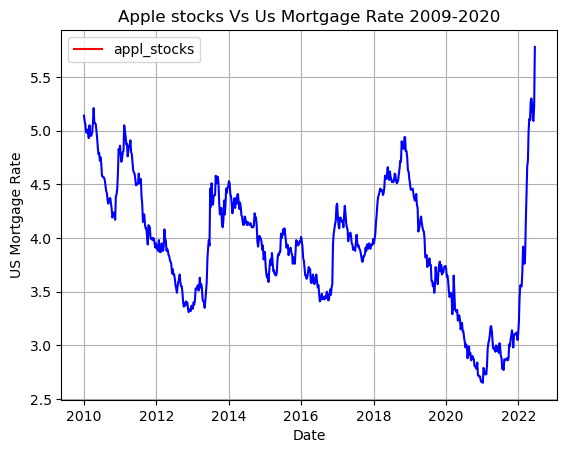

In [17]:
MORTGAGE30US, = plt.plot(close_profit_data['Date'], close_profit_data['MORTGAGE30US'], color="blue", label="MORTGAGE30US")
plt.title("Apple stocks Vs Us Mortgage Rate 2009-2020")
plt.xlabel("Date")
plt.ylabel("US Mortgage Rate")
plt.legend(handles=[appl_stocks,], loc="best")

# plt.xlim(2010,2023)
# plt.ylim(7,40)
plt.grid()
plt.show()

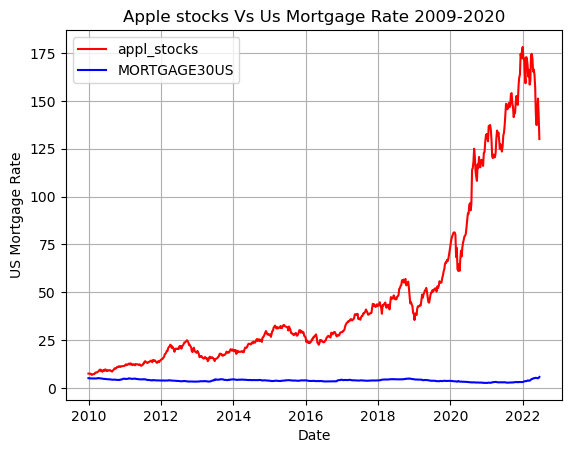

In [13]:
appl_stocks, = plt.plot(close_profit_data['Date'], close_profit_data['Close'], color="red", label="appl_stocks")
MORTGAGE30US, = plt.plot(close_profit_data['Date'], close_profit_data['MORTGAGE30US'], color="blue", label="MORTGAGE30US")
plt.title("Apple stocks Vs Us Mortgage Rate 2009-2020")
plt.xlabel("Date")
plt.ylabel("US Mortgage Rate")
plt.legend(handles=[appl_stocks, MORTGAGE30US], loc="best")

# plt.xlim(2010,2023)
# plt.ylim(7,40)
plt.grid()
plt.show()



The r-value is -0.4895563177304768


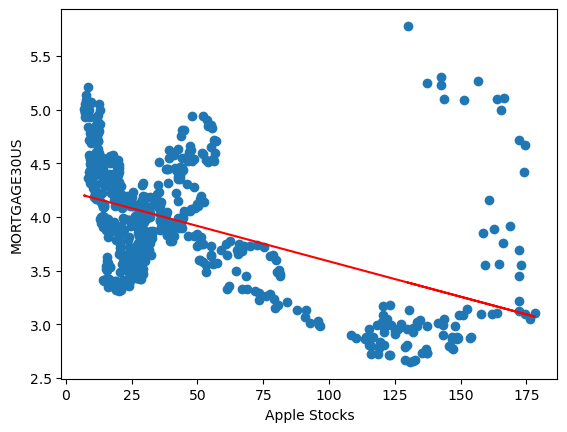

In [14]:
x_values = close_profit_data["Close"]
y_values = close_profit_data['MORTGAGE30US']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Apple Stocks")
plt.ylabel("MORTGAGE30US")
print(f'The r-value is {rvalue}')

In [15]:
close_profit_data


,Date,Close,MORTGAGE30US
0,2009-12-31,7.526071,5.14
4,2010-01-07,7.520714,5.09
9,2010-01-14,7.479643,5.06
13,2010-01-21,7.431071,4.99
18,2010-01-28,7.117500,4.98
...,...,...,...
3117,2022-05-19,137.350006,5.25
3122,2022-05-26,143.779999,5.10
3126,2022-06-02,151.210007,5.09
3131,2022-06-09,142.639999,5.23
